In [81]:
from astrodb_utils.spectra import check_spectrum_plottable
from specutils.manipulation import median_smooth
from astropy.io import fits
import astropy.units as u
import os
import pandas as pd
import numpy as np
from specutils import Spectrum1D, Spectrum
from astropy.wcs import WCS
import matplotlib.pyplot as plt

This notebook is to plot:  
- 1 SDSS spectrum (txt format)  
- 1 IMACS Magellan


In [82]:
path = '/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/sty2054_supplemental_files/'

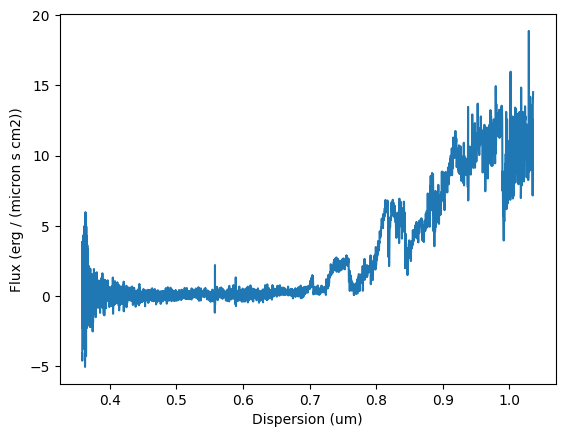

SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt is plottable.
Try smoothing


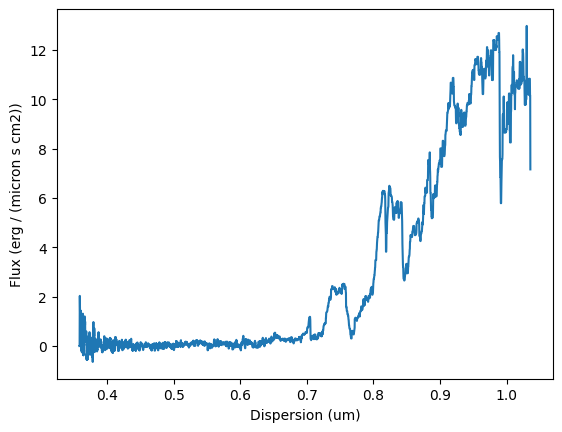

In [83]:
# Plotting SDSS intrument
filename = "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"
file_path = os.path.join(path, filename)

try: 
    data = np.loadtxt(file_path, comments="#", encoding="latin1")

    # column1: #w         column2:flux
    wavelength = (data[:, 0] * u.AA).to(u.um)
    flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

    # check plottability
    spectrum = Spectrum(spectral_axis=wavelength, flux=flux)
    if check_spectrum_plottable(spectrum, show_plot=True):
        print(f"{filename} is plottable.")

    # Try Smooth
    print("Try smoothing")
    smoothed_spectrum = median_smooth(spectrum, width=11)
    check_spectrum_plottable(smoothed_spectrum, show_plot=True)


except Exception as e:
    print(f"Could not read {filename}: {e}")


Reading FITS file: ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I.fits
   Data shape: (1870,)
   Flux unit: DU/PIXEL
   Instrument: IMACS Short-Camera
   Telescope: Baade_Mag_1


 [astropy.io.fits.verify]


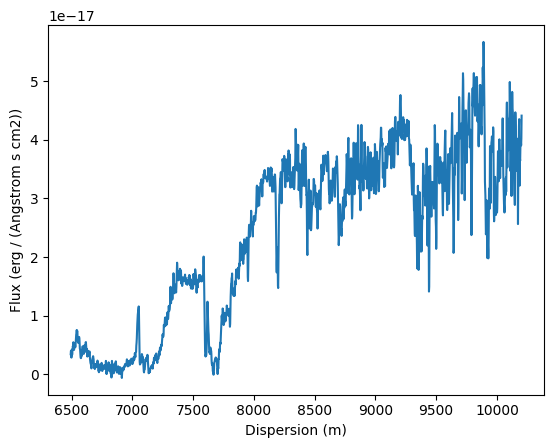

smooth spectrum


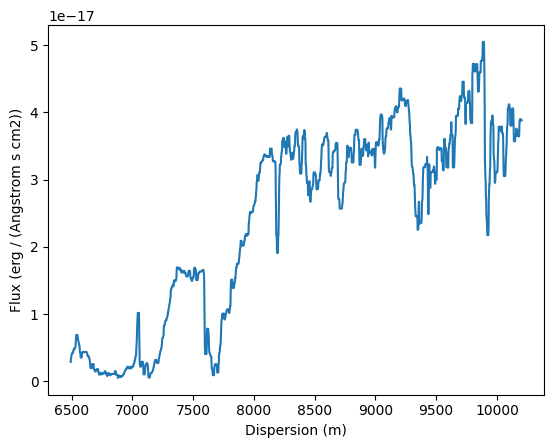

In [85]:
filename = "ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I.fits"
file_path = os.path.join(path, filename)


try:
    with fits.open(file_path) as hdul:
        data = hdul[0].data
        header = hdul[0].header.copy()


    print(f"\nReading FITS file: {filename}")
    print("   Data shape:", data.shape)
    print("   Flux unit:", header.get('BUNIT', 'Unknown'))
    print("   Instrument:", header.get('INSTRUME', 'Unknown'))
    print("   Telescope:", header.get('TELESCOP', 'Unknown'))
    
    # Set flux unit to erg/s/cm2/Angstrom
    flux_unit = u.erg / u.s / u.cm**2 / u.Angstrom

    # Fix CTYPE1 to read spectral axis
    if header.get('CTYPE1') == 'LINEAR':
        header['CTYPE1'] = 'WAVE'
    
    wcs = WCS(header)
    spec = Spectrum(flux=data * flux_unit, wcs=wcs)
    check_spectrum_plottable(spec, raise_error=True, show_plot=True)

    print("smooth spectrum")
    smoothed_spec = median_smooth(spec, width=11)
    check_spectrum_plottable(smoothed_spec, raise_error=True, show_plot=True)

except Exception as e:
    print(f"Error reading {filename}: {e}")
